# ASSIGNMENT 1

## Setup

* `$ pip install --user virtualenv`
* `$ python3 -m venv venv`
* `$ source venv/bin/activate`
* `(venv) $ pip install -r requirements.txt`
* `(venv) $ ipython kernel install --name=venv`
* **main.ipynb** > **`F1`** > `Notebook: Select Notebook Kernel` > `venv`

## Import

Before you begin to run your code, you need to load all required modules. Simply execute the code block below. This block also enables Jupyter's auto-reloading feature, so you dont need to re-import modules whenever you change them.

In [1]:
# In order to import from the python file without hassle, we add the current
# directory to the python path
import sys; sys.path.append(".")

# Auto-reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Neural Network

In [2]:
from src.util import load_data_cifar, validation_split

train_file = "./data/train_data.pckl"
test_file = "./data/test_data.pckl"

train_data, train_class, test_data, test_class = load_data_cifar(
    train_file=train_file, test_file=test_file
)

data, truths, val_data, val_truths = validation_split(
    dataset=train_data, ground_truths=train_class, pct=0.1
)

# Baseline Model (Adam, L2, LR Scheduling)

In [3]:
results = {}

[0] L: 2.0455 A: 0.2660 VL: 1.8880 VA: 0.2736 t: 8.79s
[1] L: 1.8518 A: 0.3411 VL: 1.7917 VA: 0.3420 t: 6.59s
[2] L: 1.8036 A: 0.3583 VL: 1.7338 VA: 0.3550 t: 6.29s
[3] L: 1.7610 A: 0.3766 VL: 1.7737 VA: 0.3779 t: 6.27s
[4] L: 1.7378 A: 0.3826 VL: 1.7132 VA: 0.3941 t: 6.38s
[5] L: 1.7063 A: 0.3962 VL: 1.6766 VA: 0.3941 t: 6.32s
[6] L: 1.6857 A: 0.4017 VL: 1.6850 VA: 0.4202 t: 6.35s
[7] L: 1.6756 A: 0.4064 VL: 1.6266 VA: 0.4202 t: 6.34s
[8] L: 1.6599 A: 0.4158 VL: 1.6351 VA: 0.4332 t: 6.29s
[9] L: 1.6427 A: 0.4217 VL: 1.6478 VA: 0.3713 t: 6.22s
[10] L: 1.6374 A: 0.4207 VL: 1.6127 VA: 0.4267 t: 6.30s
[11] L: 1.6256 A: 0.4273 VL: 1.6386 VA: 0.4235 t: 6.28s
[12] L: 1.6148 A: 0.4294 VL: 1.6047 VA: 0.4300 t: 6.29s
[13] L: 1.6050 A: 0.4331 VL: 1.6068 VA: 0.4495 t: 6.24s
[14] L: 1.5958 A: 0.4357 VL: 1.6021 VA: 0.4332 t: 6.26s
[15] L: 1.5897 A: 0.4392 VL: 1.6087 VA: 0.4072 t: 6.26s
[16] L: 1.5857 A: 0.4411 VL: 1.5790 VA: 0.4397 t: 6.26s
[17] L: 1.5771 A: 0.4420 VL: 1.5779 VA: 0.4267 t: 6.26s
[1

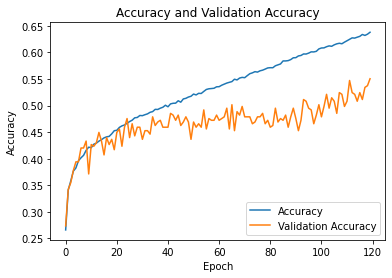

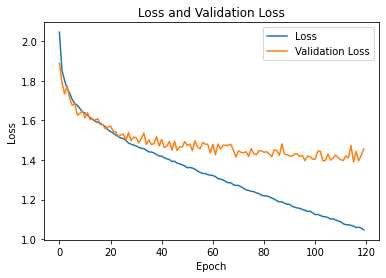

Test Data | Accuracy: 0.4804, Loss 1.5436


In [4]:
from src.activations import sigmoid, sigmoid_prime
from src.network import Network
from src.util import plot_model


optimizer_config = {"type": "adam", "epsilon": 1e-7, "beta_1": 0.9, "beta_2": 0.999}
hidden_layer_config = {"activation": sigmoid, "act_prime": sigmoid_prime}
validation_k = 1

net = Network()
net.add_layer(neurons=train_data.shape[0], type="input")
net.add_layer(neurons=180, type="hidden")
net.add_layer(neurons=10, type="output")
net.set(property="optimizer", val=optimizer_config)
net.set(property="activation", val=hidden_layer_config)
net.set(property="learning_rate", val=0.001)
net.set(property="decay", val=0.00001)
net.set(property="validation_k", val=validation_k)
net.set(property="lambda", val=0.5)

loss, acc, val_loss, val_acc = net.train(
    training_data=data,
    training_class=truths,
    val_data=val_data,
    val_class=val_truths,
    epochs=120,
    mini_batch_size=256,
)
f_loss, f_acc = net.eval_network(test_data, test_class)
results["adam"] = {
    "acc": acc,
    "loss": loss,
    "val_acc": val_acc,
    "val_loss": val_loss,
    "f_acc": f_acc,
    "f_loss": f_loss
}
plot_model(acc, loss, val_acc, val_loss, validation_k)
print(f"Test Data | Accuracy: {f_acc:.4f}, Loss {f_loss:.4f}")

In [ ]:
from src.util import save_model


save_model("baseline", net)
save_model("results", results)

### SGD, Learning Rate Schedule, L2 Regularization

[0] L: 2.3182 A: 0.1036 VL: 2.3044 VA: 0.1629 t: 3.92s
[1] L: 2.2981 A: 0.1267 VL: 2.2956 VA: 0.0847 t: 3.92s
[2] L: 2.2933 A: 0.1524 VL: 2.2918 VA: 0.1824 t: 3.95s
[3] L: 2.2875 A: 0.1869 VL: 2.2839 VA: 0.0489 t: 3.97s
[4] L: 2.2800 A: 0.1942 VL: 2.2761 VA: 0.2248 t: 3.99s
[5] L: 2.2698 A: 0.2086 VL: 2.2690 VA: 0.1564 t: 3.99s
[6] L: 2.2559 A: 0.2159 VL: 2.2461 VA: 0.2378 t: 4.24s
[7] L: 2.2368 A: 0.2149 VL: 2.2186 VA: 0.2345 t: 4.20s
[8] L: 2.2116 A: 0.2176 VL: 2.1906 VA: 0.2313 t: 4.22s
[9] L: 2.1791 A: 0.2240 VL: 2.1576 VA: 0.2508 t: 4.49s
[10] L: 2.1394 A: 0.2273 VL: 2.1110 VA: 0.2410 t: 4.20s
[11] L: 2.0958 A: 0.2298 VL: 2.0740 VA: 0.2345 t: 4.03s
[12] L: 2.0511 A: 0.2325 VL: 2.0329 VA: 0.2476 t: 4.12s
[13] L: 2.0093 A: 0.2382 VL: 1.9986 VA: 0.2508 t: 4.05s
[14] L: 1.9718 A: 0.2418 VL: 1.9687 VA: 0.2476 t: 4.00s
[15] L: 1.9400 A: 0.2488 VL: 1.9495 VA: 0.2573 t: 3.90s
[16] L: 1.9135 A: 0.2590 VL: 1.9316 VA: 0.2573 t: 4.24s
[17] L: 1.8914 A: 0.2701 VL: 1.9192 VA: 0.2248 t: 4.40s
[1

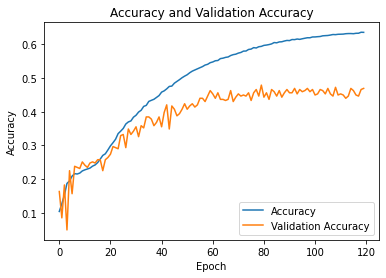

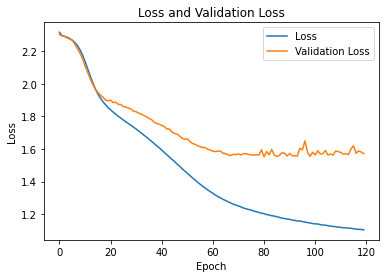

Test Data | Accuracy: 0.4663, Loss 1.6253


In [18]:
from src.activations import sigmoid, sigmoid_prime
from src.network import Network
from src.util import plot_model


optimizer_config = {"type": "sgd"}
hidden_layer_config = {"activation": sigmoid, "act_prime": sigmoid_prime}
validation_k = 1

net = Network()
net.add_layer(neurons=train_data.shape[0], type="input")
net.add_layer(neurons=180, type="hidden")
net.add_layer(neurons=10, type="output")
net.set(property="optimizer", val=optimizer_config)
net.set(property="activation", val=hidden_layer_config)
net.set(property="learning_rate", val=0.01)
net.set(property="decay", val=0.00001)
net.set(property="validation_k", val=validation_k)
net.set(property="lambda", val=0.5)

loss, acc, val_loss, val_acc = net.train(
    training_data=data,
    training_class=truths,
    val_data=val_data,
    val_class=val_truths,
    epochs=120,
    mini_batch_size=256,
)
f_loss, f_acc = net.eval_network(test_data, test_class)
results["sgd"] = {
    "acc": acc,
    "loss": loss,
    "val_acc": val_acc,
    "val_loss": val_loss,
    "f_acc": f_acc,
    "f_loss": f_loss
}
plot_model(acc, loss, val_acc, val_loss, validation_k)
print(f"Test Data | Accuracy: {f_acc:.4f}, Loss {f_loss:.4f}")

In [19]:
from src.util import save_model


save_model("sgd", net)
save_model("results", results)

### Adam, Learning Rate Schedule, No Regularization

[0] L: 2.0812 A: 0.1805 VL: 2.0058 VA: 0.1726 t: 6.73s
[1] L: 1.9922 A: 0.2020 VL: 2.0013 VA: 0.2020 t: 6.48s
[2] L: 1.9619 A: 0.2204 VL: 1.9704 VA: 0.1987 t: 6.57s
[3] L: 1.9416 A: 0.2369 VL: 1.9151 VA: 0.2280 t: 6.63s
[4] L: 1.9069 A: 0.2574 VL: 1.8858 VA: 0.2541 t: 6.97s
[5] L: 1.8676 A: 0.2780 VL: 1.8629 VA: 0.2541 t: 6.74s
[6] L: 1.8295 A: 0.2976 VL: 1.8061 VA: 0.3290 t: 6.55s
[7] L: 1.8018 A: 0.3105 VL: 1.8167 VA: 0.2866 t: 6.74s
[8] L: 1.7850 A: 0.3202 VL: 1.8214 VA: 0.2997 t: 6.90s
[9] L: 1.7744 A: 0.3190 VL: 1.7868 VA: 0.3518 t: 6.61s
[10] L: 1.7555 A: 0.3323 VL: 1.7569 VA: 0.3453 t: 7.06s
[11] L: 1.7438 A: 0.3397 VL: 1.7806 VA: 0.3388 t: 7.12s
[12] L: 1.7298 A: 0.3484 VL: 1.7475 VA: 0.3648 t: 6.64s
[13] L: 1.7188 A: 0.3550 VL: 1.7076 VA: 0.3746 t: 6.69s
[14] L: 1.7083 A: 0.3587 VL: 1.7389 VA: 0.4007 t: 7.11s
[15] L: 1.6950 A: 0.3664 VL: 1.6815 VA: 0.3583 t: 6.86s
[16] L: 1.6910 A: 0.3686 VL: 1.7140 VA: 0.3811 t: 6.66s
[17] L: 1.6728 A: 0.3766 VL: 1.6915 VA: 0.3550 t: 6.75s
[1

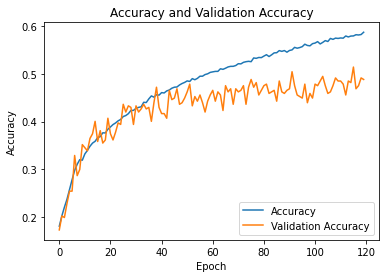

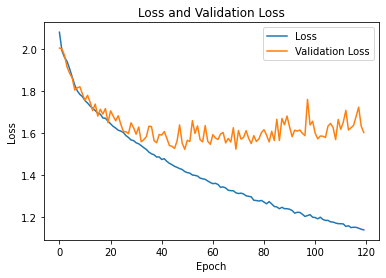

Test Data | Accuracy: 0.4396, Loss 1.7186


In [21]:
from src.activations import sigmoid, sigmoid_prime
from src.network import Network
from src.util import plot_model


optimizer_config = {"type": "adam", "epsilon": 1e-7, "beta_1": 0.9, "beta_2": 0.999}
hidden_layer_config = {"activation": sigmoid, "act_prime": sigmoid_prime}
validation_k = 1

net = Network()
net.add_layer(neurons=train_data.shape[0], type="input")
net.add_layer(neurons=180, type="hidden")
net.add_layer(neurons=10, type="output")
net.set(property="optimizer", val=optimizer_config)
net.set(property="activation", val=hidden_layer_config)
net.set(property="learning_rate", val=0.001)
net.set(property="decay", val=0.00001)
net.set(property="validation_k", val=validation_k)

loss, acc, val_loss, val_acc = net.train(
    training_data=data,
    training_class=truths,
    val_data=val_data,
    val_class=val_truths,
    epochs=120,
    mini_batch_size=256,
)
f_loss, f_acc = net.eval_network(test_data, test_class)
results["adam_no_reg"] = {
    "acc": acc,
    "loss": loss,
    "val_acc": val_acc,
    "val_loss": val_loss,
    "f_acc": f_acc,
    "f_loss": f_loss
}
plot_model(acc, loss, val_acc, val_loss, validation_k)
print(f"Test Data | Accuracy: {f_acc:.4f}, Loss {f_loss:.4f}")

In [23]:
from src.util import save_model


save_model("adam_no_reg", net)
save_model("results", results)

### Adam, No Learning Rate Schedule, L2 Regularization

[0] L: 2.1153 A: 0.1693 VL: 1.9886 VA: 0.1922 t: 8.10s
[1] L: 1.9792 A: 0.2270 VL: 1.9449 VA: 0.2345 t: 8.10s
[2] L: 1.9336 A: 0.2561 VL: 1.9388 VA: 0.2508 t: 8.09s
[3] L: 1.8997 A: 0.2736 VL: 1.9170 VA: 0.2313 t: 8.04s
[4] L: 1.8844 A: 0.2822 VL: 1.8808 VA: 0.2834 t: 8.05s
[5] L: 1.8592 A: 0.2958 VL: 1.8382 VA: 0.3127 t: 8.34s
[6] L: 1.8465 A: 0.3015 VL: 1.9507 VA: 0.2899 t: 8.14s
[7] L: 1.8395 A: 0.3038 VL: 1.8827 VA: 0.3062 t: 8.09s
[8] L: 1.8305 A: 0.3078 VL: 1.8659 VA: 0.2866 t: 7.95s
[9] L: 1.8270 A: 0.3099 VL: 1.8589 VA: 0.2997 t: 7.92s
[10] L: 1.8204 A: 0.3123 VL: 1.8715 VA: 0.3029 t: 7.94s
[11] L: 1.8135 A: 0.3144 VL: 1.8208 VA: 0.3094 t: 8.01s
[12] L: 1.8115 A: 0.3159 VL: 1.8652 VA: 0.3029 t: 7.99s
[13] L: 1.8047 A: 0.3218 VL: 1.8702 VA: 0.3094 t: 7.89s
[14] L: 1.8109 A: 0.3216 VL: 1.8286 VA: 0.2834 t: 7.85s
[15] L: 1.7984 A: 0.3252 VL: 1.8472 VA: 0.3160 t: 7.90s
[16] L: 1.8024 A: 0.3280 VL: 1.8892 VA: 0.3322 t: 8.01s
[17] L: 1.8116 A: 0.3285 VL: 1.8592 VA: 0.3420 t: 7.76s
[1

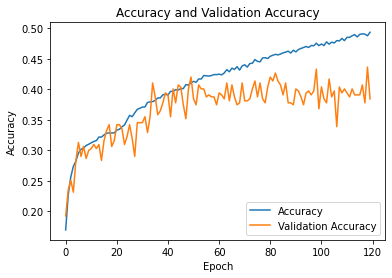

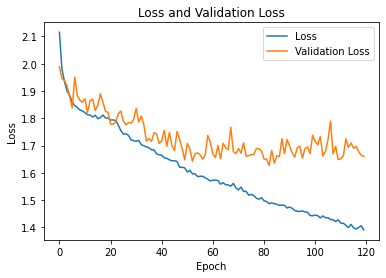

Test Data | Accuracy: 0.4081, Loss 1.7382


In [31]:
from src.activations import sigmoid, sigmoid_prime
from src.network import Network
from src.util import plot_model


optimizer_config = {"type": "adam", "epsilon": 1e-7, "beta_1": 0.9, "beta_2": 0.999}
hidden_layer_config = {"activation": sigmoid, "act_prime": sigmoid_prime}
validation_k = 1

net = Network()
net.add_layer(neurons=train_data.shape[0], type="input")
net.add_layer(neurons=180, type="hidden")
net.add_layer(neurons=10, type="output")
net.set(property="optimizer", val=optimizer_config)
net.set(property="activation", val=hidden_layer_config)
net.set(property="learning_rate", val=0.001)
net.set(property="validation_k", val=validation_k)
net.set(property="lambda", val=0.5)

loss, acc, val_loss, val_acc = net.train(
    training_data=data,
    training_class=truths,
    val_data=val_data,
    val_class=val_truths,
    epochs=120,
    mini_batch_size=256,
)
f_loss, f_acc = net.eval_network(test_data, test_class)
results["adam_no_lr_sched"] = {
    "acc": acc,
    "loss": loss,
    "val_acc": val_acc,
    "val_loss": val_loss,
    "f_acc": f_acc,
    "f_loss": f_loss
}
plot_model(acc, loss, val_acc, val_loss, validation_k)
print(f"Test Data | Accuracy: {f_acc:.4f}, Loss {f_loss:.4f}")

In [ ]:
from src.util import save_model


save_model("adam_no_lr_sched", net)
save_model("results", results)

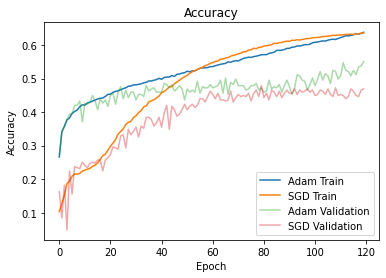

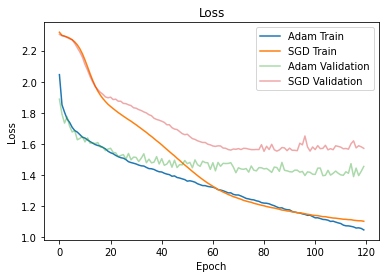

In [28]:
from src.util import compare_models

adam = results["adam"]
sgd = results["sgd"]

compare_models(
    adam["acc"],
    sgd["acc"],
    adam["val_acc"],
    sgd["val_acc"],
    "Accuracy",
    "Adam",
    "SGD",
    validation_k,
)
compare_models(
    adam["loss"],
    sgd["loss"],
    adam["val_loss"],
    sgd["val_loss"],
    "Loss",
    "Adam",
    "SGD",
    validation_k,
)

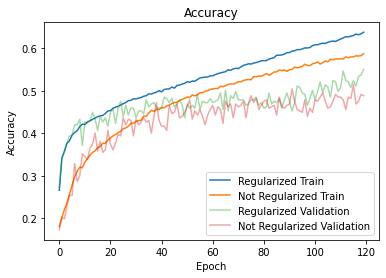

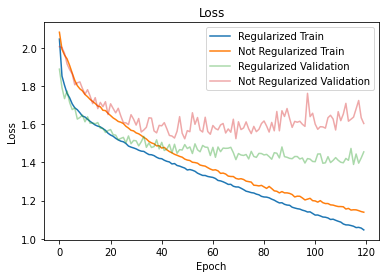

In [29]:
from src.util import compare_models

adam = results["adam"]
no_reg = results["adam_no_reg"]

compare_models(
    adam["acc"],
    no_reg["acc"],
    adam["val_acc"],
    no_reg["val_acc"],
    "Accuracy",
    "Regularized",
    "Not Regularized",
    validation_k,
)
compare_models(
    adam["loss"],
    no_reg["loss"],
    adam["val_loss"],
    no_reg["val_loss"],
    "Loss",
    "Regularized",
    "Not Regularized",
    validation_k,
)

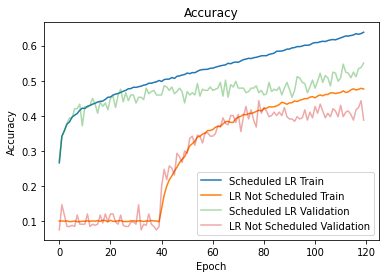

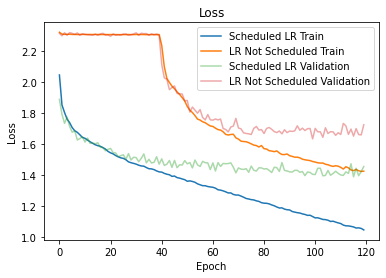

In [30]:
from src.util import compare_models

adam = results["adam"]
no_lr = results["adam_no_lr_sched"]

compare_models(
    adam["acc"],
    no_lr["acc"],
    adam["val_acc"],
    no_lr["val_acc"],
    "Accuracy",
    "Scheduled LR",
    "LR Not Scheduled",
    validation_k,
)
compare_models(
    adam["loss"],
    no_lr["loss"],
    adam["val_loss"],
    no_lr["val_loss"],
    "Loss",
    "Scheduled LR",
    "LR Not Scheduled",
    validation_k,
)